In [1]:
import imp
import uproot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
helper = imp.load_source('helpfunction','/home/tmettler/Desktop/uBoone/do_plots/helpfunction.py')
#import /home/tmettler/Desktop/uBoone/do_plots/helpfunction as helper
from __future__ import division

import collections
NuCC = imp.load_source('NuCC_function','/home/tmettler/Desktop/uBoone/do_plots/NuCC_function.py')


Welcome to JupyROOT 6.10/08


In [2]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1200,600)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [3]:
%%javascript
if(!requiresjs){
    var s = document.createElement('script');
    s.src='https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.6/require.min.js';
    document.body.appendChild(s)
}

<IPython.core.display.Javascript object>

In [4]:
%jsroot off

In [5]:
# Load input files
inputdir = '/home/tmettler/Desktop/PhD/uBoone/NTP_problem/'
outputdir = inputdir+'NPT_plots/' 
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename = 'NTP_out6.root'
tree_name = 't2'
data = ROOT.TChain(tree_name)
data.Add( inputdir + filename)
print "Data: Number of Entries:\t", data.GetEntries()

Data: Number of Entries:	3182929


Deviation: -0.0414651063407  ms per second

****************************************
Minimizer is Linear
Chi2                      =  1.72482e+06
NDf                       =         5221
p0                        =  6.54741e+07   +/-   306828      
p1                        =   -0.0414651   +/-   0.000194316 


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/PhD/uBoone/NTP_problem/NPT_plots//png/h_dev_ms.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/PhD/uBoone/NTP_problem/NPT_plots//root/h_dev_ms.root has been created


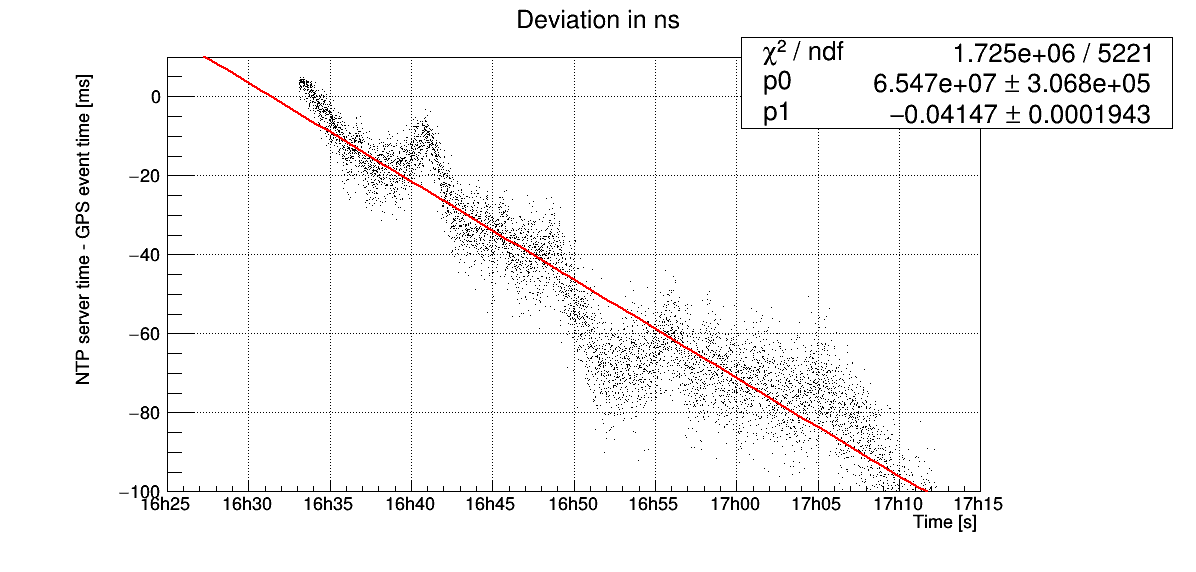

In [6]:
xstart = 1579.0155e6
xend = 1579.0185e6
xbin = 500
ystart = -100
yend = 10
ybin = 200
ROOT.gStyle.SetOptFit(1)
c1.SetLogy(0)
name = '_ms'
h_2d = ROOT.TH2F('h_2d','Deviation in ns',xbin,xstart,xend,ybin,ystart,yend)#, ybin, ystart, yend)
data.Draw("event3.ts0/1e6-event1.adc[0]:event1.ts0>>h_2d","event3.lost1==1 && abs(event3.ts0/1e6-event1.adc[0])<100","")
h_2d.SetXTitle("Time [s]")
h_2d.SetYTitle("NTP server time - GPS event time [ms]")
h_2d.GetXaxis().SetTimeDisplay(1)
f1 = ROOT.TF1("f1","pol1")
h_2d.Fit("f1","");
time_per_second = f1.GetParameter(1)
print 'Deviation:', f1.GetParameter(1),' ms per second'
h_2d.Draw()
#h_1d_p.SetLineColor(2)
#h_1d_p.Draw('same')
#c1.SetLogz()
c1.Draw()
c1.SaveAs(outputdir_png + "h_dev"+name+".png")
c1.SaveAs(outputdir_root + "h_dev"+name+".root")

Deviation: 0.057689132227  events per second

****************************************
Minimizer is Linear
Chi2                      =  1.66645e+06
NDf                       =         4325
p0                        = -9.10921e+07   +/-   345031      
p1                        =    0.0576891   +/-   0.00021851  


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/PhD/uBoone/NTP_problem/NPT_plots/h_ntp_entry2.png has been created


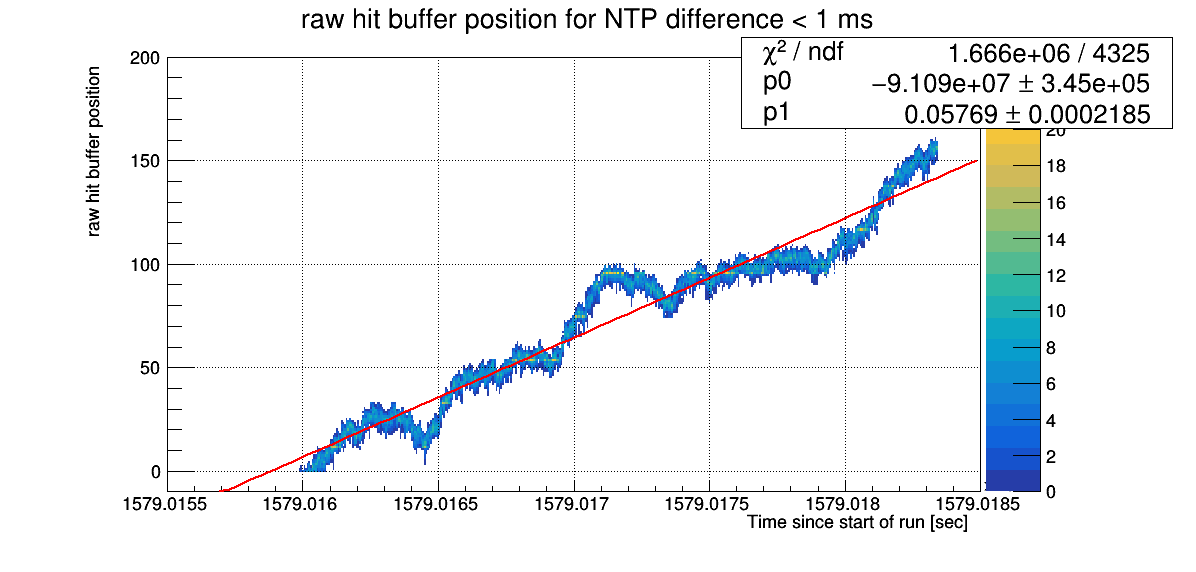

In [7]:
xstart = 1579.0155e6
xend = 1579.0185e6
xbin = 500
y_start = -10
y_end = 200
y_bins = 200
c1.SetLogy(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1);
h_ntp_entry = ROOT.TH2F("h_ntp_entry","raw hit buffer position for NTP difference < 1 ms",xbin,xstart,xend,y_bins,y_start,y_end)
data.Draw('event3.lost1:event1.ts0>>h_ntp_entry','event1.ts0>1e9 && abs(event1.adc[0] - event3.ts0/1e6)<1')
h_ntp_entry.SetXTitle("Time since start of run [sec]");
h_ntp_entry.SetYTitle("raw hit buffer position");
h_ntp_entry.Draw("colz")
f1 = ROOT.TF1("f1","pol1")
h_ntp_entry.Fit("f1","");
c1.Draw()
c1.SaveAs(outputdir + "h_ntp_entry2.png");
events_per_second = f1.GetParameter(1)
print 'Deviation:', f1.GetParameter(1),' events per second'
#ROOT.gStyle.SetOptStat(0)
#ROOT.gStyle.SetOptFit(0);

First mean: 1351.16739127
Second mean: 2714.74999123
 FCN=72.0624 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=1.39809e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.02008e+02   2.72601e+00   9.13968e-03  -4.05631e-06
   2  Mean         1.35117e+03   7.39797e-01   3.07668e-03  -9.74897e-06
   3  Sigma        3.40098e+01   5.51575e-01   1.77034e-05   1.17912e-03
 FCN=11.9602 FROM MIGRAD    STATUS=CONVERGED     118 CALLS         119 TOTAL
                     EDM=8.36286e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.52592e+00   3.33396e-01   3.99621e-04  -1.41122e-04
   2  Mean         2.71475e+03   2.96596e+01   5.2057

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/PhD/uBoone/NTP_problem/NPT_plots/h_evrate_all.png has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/PhD/uBoone/NTP_problem/NPT_plots/h_evrate_all_log.png has been created


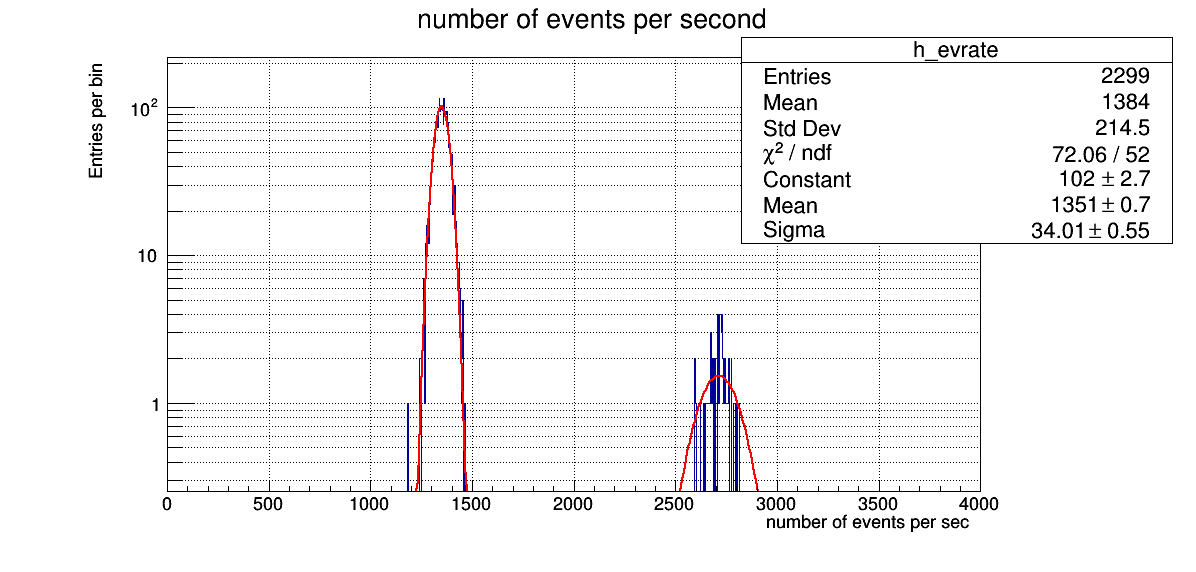

In [14]:

start_x = 0
end_x = 4000
x_bins = 1000
ROOT.gStyle.SetOptStat(1)
ROOT.gStyle.SetOptFit(1)
c1.SetLogy(0)
h_evrate = ROOT.TH1F("h_evrate","number of events per second",x_bins,start_x,end_x)
data.Draw('rate_counter>>h_evrate','event3.flags==7 || event3.flags==5')
h_evrate.SetXTitle("number of events per sec");
h_evrate.SetYTitle("Entries per bin");
#h_evrate.Fit("gaus");
f1 = ROOT.TF1("f1","gaus",500,1500)
h_evrate.Fit("f1","R");
mean_eventrate  = f1.GetParameter(1)
print 'First mean:', f1.GetParameter(1)
f2 = ROOT.TF1("f2","gaus",2400,3000)
h_evrate.Fit("f2","R+");
print 'Second mean:', f2.GetParameter(1)

h_evrate.Draw("")
c1.Draw()
c1.SaveAs(outputdir + "h_evrate_all.png");
c1.SetLogy(1)
c1.Draw()
c1.SaveAs(outputdir + "h_evrate_all_log.png");

#ROOT.gStyle.SetOptStat(0)
#ROOT.gStyle.SetOptFit(0)

In [9]:
duration = 1579018343 - 1579015987
#estimated deviation from time to entires and entries to time
#from time_per_second, events_per_second, mean_eventrate
estimation_time = events_per_second*duration*1000.0/mean_eventrate
estimation_events = -time_per_second/1000.0*mean_eventrate*duration
print 'estimated time deviation: ', estimation_time, ' ms'
print 'estimated event deviation: ', estimation_events, ' events'

estimated time deviation:  100.591234221  ms
estimated event deviation:  131.99796177  events


In [10]:
data.Show(1000)
data.Show(data.GetEntries()-1)

======> EVENT:1000
 mac5            = 65535
 flags           = 65535
 lost1           = 0
 lost2           = 1
 ts0             = 1579015987
 ts1             = 1579015987
 adc             = 773, 
                  781, 440, 0, 25344, 37139, 32714, 0, 0, 0, 0, 
                  0, 25840, 37139, 32714, 0, 49152, 38468, 32714, 0
 s               = 0
 ms              = 0
 mac5            = 0
 flags           = 1
 lost1           = 156
 lost2           = 2
 ts0             = 879349743
 ts1             = 53703471
 adc             = 0, 
                  0, 0, 0, 59144, 838, 0, 0, 0, 0, 0, 
                  0, 0, 0, 0, 0, 0, 0, 0, 0
 s               = 42907008
 ms              = 0
 feb_evcounter   = 1001
 rate_counter    = 1001
======> EVENT:3182928
 mac5            = 65535
 flags           = 65535
 lost1           = 0
 lost2           = 0
 ts0             = 1579018343
 ts1             = 1579018343
 adc             = 525, 
                  533, 412, 0, 25344, 37139, 32714, 0, 0, 0, 0, 
   

In [8]:
xstart = 2e8
xend = 2e8+10000
xbin = 10000
cut = 'abs(event3.ts0-'+str((xend-xstart)/2)+')<'+str(xbin/2)
h_1d = ROOT.TH1F("h_1d","Ts0 ns",xbin, xstart, xend)
data.Draw('event3.ts0>>h_1d',cut)
h_1d.SetXTitle("nanoseconds sincs PPS")
h_1d.SetYTitle("number of entries")
tot = h_1d.GetEntries()
particle = [(0,0)]
#num_particle = []
print 'Total number of entries: ',h_1d.GetEntries()
for i in range(xbin):
    num = h_1d.GetBinContent(i)
    if num>1 :
        particle.append((num,i+xstart-1))
print 'Total number of dublicated entries of ', h_1d.GetEntries()/1000.0,'k :', len(particle)
particle.sort() 
for x in reversed(range(len(particle)-1)): 
    print 'PDG: ', particle[x+1][1],'\t=\t{0:0.1f}%'.format(particle[x+1][0]*100/tot), ',\terror: {0:0.1f}%'.format(math.sqrt(particle[x+1][0])*100/tot)

Total number of entries:  3182929.0
Total number of dublicated entries of  3182.929 k : 2
PDG:  199999999.0 	=	20.0% ,	error: 0.0%


In [7]:
#probability of dublicated entires 0 to 10'000'000 from (3'182'929)/1e9*1e7:
import math
import scipy.special
#math.factorial(1000)
#math.comb(n, k)
'''num_entires = h_1d.GetEntries()
n = 1000000000
g = 7
k = int(num_entires*n/1000000000)
print k

P = math.factorial(k)/math.pow(2,g)# *math.comb(n-g,k-2*g) *math.comb(n,g)/math.pow(n,k)
P1 = scipy.special.comb(n-g,k-2*g)
P2 = scipy.special.comb(n,g)/math.pow(n,k)
print P, P1, P2
print P*P1*P2
'''

'num_entires = h_1d.GetEntries()\nn = 1000000000\ng = 7\nk = int(num_entires*n/1000000000)\nprint k\n\nP = math.factorial(k)/math.pow(2,g)# *math.comb(n-g,k-2*g) *math.comb(n,g)/math.pow(n,k)\nP1 = scipy.special.comb(n-g,k-2*g)\nP2 = scipy.special.comb(n,g)/math.pow(n,k)\nprint P, P1, P2\nprint P*P1*P2\n'

In [9]:
h_1d = ROOT.TH1F("h_1d","Ts0 ns",100, 0, 1e9)
data.Draw('event3.ts0>>h_1d')
n=10000
k=int(h_1d.GetEntries()*n/1e9)
P = (math.factorial(n)/math.factorial(n-k))/math.pow(n,k)
print P

0.954519365674


In [25]:
for i in range(100):
    xstart = 5e8+i*10000
    xend = 5e8+(i+1)*10000
    xbin = 10000
    cut = 'abs(event3.ts0-'+str((xend-xstart)/2+xstart)+'-1)<'+str(xbin/2)
    h_1d = ROOT.TH1F("h_1d","Ts0 ns",xbin, xstart, xend)
    data.Draw('event3.ts0>>h_1d','')
    h_1d.SetXTitle("nanoseconds sincs PPS")
    h_1d.SetYTitle("number of entries")
    tot = h_1d.GetEntries()
    particle = [(0,0)]
    #num_particle = []
    #print 'Total number of entries: ',h_1d.GetEntries()
    for j in range(1,xbin):
        num = h_1d.GetBinContent(j)
        if num>1 :
            particle.append((num,j+xstart-1))
    #print 'Total number of dublicated entries of interval', i ,' k :', len(particle)-1
    particle.sort() 
    for x in reversed(range(len(particle)-1)): 
        print 'Ts0: ', particle[x+1][1],' ns ,\tinterval: ',i
    h_1d.Delete();

Ts0:  500354018.0  ns ,	interval:  35
Ts0:  500445558.0  ns ,	interval:  44


Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_1d (Potential memory leak).
Warning in <TROO

In [24]:
from scipy import stats
print P
print int((1-P)*3000)
p_value = 1.0-stats.poisson.cdf(148,136) # cdf = cumulated density function, see below
print('The p-value = %1.5f'% p_value) # This way can format the printing: 1.3f means one digit before comma and two digits after (f = float/real number)

0.954519365674
136
The p-value = 0.14228


In [13]:
xstart = 1579015987
xend =   1579015987+20
xbin = 100
ystart = 0
yend = 1e9
ybin = 40
ybin2 = 200
c1.SetLogy(0)
name = '_'
#variable = "event3.ts0:event1.ts0+event3.ts0/1e9"
variable = "event3.ts0:event1.ts0"
cut = ''
h_2d = ROOT.TH2F('h_2d','Deviation in ns',xbin,xstart,xend,ybin,ystart,yend)#, ybin, ystart, yend)
h_2d_1 = ROOT.TH2F('h_2d_1','Deviation in ns',xbin,xstart,xend,ybin2,ystart,yend)#, ybin, ystart, yend)
h_2d_2 = ROOT.TH2F('h_2d_2','Deviation in ns',xbin,xstart,xend,ybin2,ystart,yend)#, ybin, ystart, yend)
#h_2d_2 = ROOT.TH2F('h_2d_2','Deviation in ns',xbin,xstart,xend,ybin,ystart,yend)#, ybin, ystart, yend)
data.Draw(variable+">>h_2d",cut,"colz")
#data.Draw('event1.adc[0]*1e6:event1.ts0+event1.adc[0]/1000'+">>h_2d_1",cut,"")
#data.Draw('event1.adc[1]*1e6:event1.ts0+event1.adc[0]/1000'+">>h_2d_2",cut,"")
data.Draw('event1.adc[0]*1e6:event1.ts0'+">>h_2d_1",cut,"")
data.Draw('event1.adc[1]*1e6:event1.ts0'+">>h_2d_2",cut,"")

#data2.Draw(variable+">>h_2d_2",cut,"")

h_2d.SetXTitle("Time [s]")
h_2d.SetYTitle("Ts0 [ns]")
h_2d.GetXaxis().SetTimeDisplay(1)
h_2d_1.SetMarkerStyle(6)
h_2d_1.SetMarkerColor(2)
h_2d_2.SetMarkerStyle(6)
h_2d_2.SetMarkerColor(3)
#h_2d.SetMaximum(3)
h_2d.Draw("colz")
h_2d_1.Draw('same')
h_2d_2.Draw('same')
c1.SetLogz(0)
c1.Draw()
c1.SaveAs(outputdir_png + "h_ts0"+name+".png")
c1.SaveAs(outputdir_root + "h_ts0"+name+".root")

Warning in <TROOT::Append>: Replacing existing TH1: h_2d (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/PhD/uBoone/NTP_problem/NPT_plots//png/h_ts0_.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/PhD/uBoone/NTP_problem/NPT_plots//root/h_ts0_.root has been created


# FEB data analysis with numpy and pandas using a ROOT tree

In [2]:
#load needed libaris
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import uproot
import pandas as pd
#import os
#import ROOT
#import time
import math

In [3]:
#define which file to read
inputdir = '/home/tmettler/cernbox/PhD/uBoone/NTP_problem/Chrono_test/'
filename = 'Test16_corr_12000Hz.bin.1NTPsbnd.root'

In [4]:
#use uproot to read the CERN ROOT TTree file as a pandas
data_up = uproot.open(inputdir+filename)['t2']
#data_up.keys()
cols = ['ev_mac5','ev_flags','ev_buffer','ev_ts0','ev_ts1','ev_adc1','poll_s','poll_ns','poll_s_end','poll_ns_end',\
       'ev_in_poll','corr_s','corr_ns','corr_s_end','corr_ns_end','feb_evcounter','rate_counter',\
       'ev_poll_nr'] # define the branches aka columns od the tree

tree_feb = data_up.pandas.df(cols) # read in the TTree file as a pandas
print 'Number of entries: ',data_up.numentries # print the number of entries
#print([c.decode('UTF-8') for c in data_up.keys()])
print 'First entry variables: '
for element in cols:
    print '%15s :\t'%element,tree_feb[element][600]

Number of entries:  2875492
First entry variables: 
        ev_mac5 :	0
       ev_flags :	1
      ev_buffer :	139
         ev_ts0 :	894318470
         ev_ts1 :	739831126
        ev_adc1 :	154
         poll_s :	1579100387
        poll_ns :	769987241
     poll_s_end :	1579100387
    poll_ns_end :	777375896
     ev_in_poll :	444
         corr_s :	-1
        corr_ns :	1515
     corr_s_end :	-1
    corr_ns_end :	-1
  feb_evcounter :	601
   rate_counter :	601
     ev_poll_nr :	2


In [83]:
tree_feb.tail() # show data

,ev_mac5,ev_flags,ev_buffer,ev_ts0,ev_ts1,ev_adc1,poll_s,poll_ns,poll_s_end,poll_ns_end,ev_in_poll,corr_s,corr_ns,corr_s_end,corr_ns_end,feb_evcounter,rate_counter,ev_poll_nr
entry,,,,,,,,,,,,,,,,,,
2875487,0,1,443,540731779,870200556,69,1579102550,297971602,1579102550,304867475,367,-1,1533,-1,-1,2875488,687,6932
2875488,0,1,444,540819827,870288603,147,1579102550,297971602,1579102550,304867475,367,-1,1533,-1,-1,2875489,688,6932
2875489,0,1,445,541596042,871064818,103,1579102550,297971602,1579102550,304867475,367,-1,1533,-1,-1,2875490,689,6932
2875490,0,1,446,541965865,871434641,144,1579102550,297971602,1579102550,304867475,367,-1,1533,-1,-1,2875491,690,6932
2875491,0,1,447,542020921,871489697,158,1579102550,297971602,1579102550,304867475,367,-1,1533,-1,-1,2875492,691,6932


In [6]:
tree_feb.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875492 entries, 0 to 2875491
Columns: 18 entries, ev_mac5 to ev_poll_nr
dtypes: int32(17), uint16(1)
memory usage: 192.0 MB


/home/tmettler/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


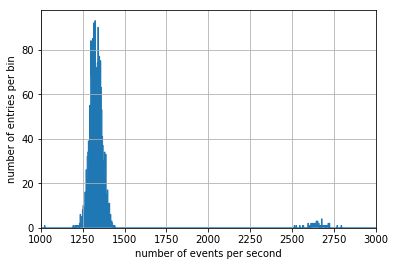

In [7]:
#plot the number of entries per second (second peak due to missed ts0 ref event)
ax = tree_feb.query('ev_flags==5 or ev_flags==7')['rate_counter'].plot.hist(\
            fill=True,histtype='step',grid='True',xlim=[1000,3000],bins=1000)
ax.set_xlabel('number of events per second')
ax.set_ylabel('number of entries per bin')
plt.show()

/home/tmettler/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


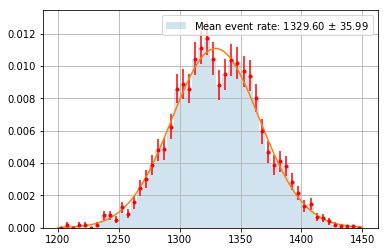

In [8]:
# get mean and std for label
x = np.linspace(1200,1450,100)
cut = '(ev_flags==5 or ev_flags==7) and rate_counter<1500 and rate_counter>1200'
plt.plot(x,stats.norm.pdf(x,tree_feb.query(cut)['rate_counter'].mean(),\
                                tree_feb.query(cut)['rate_counter'].std()))
my_label =  'Mean event rate: %5.2f $\pm$ %5.2f'%tuple([tree_feb.query(cut)['rate_counter'].mean(), tree_feb.query(cut)['rate_counter'].std()])

#get first histo for normalisation
entries1, edges, patches = plt.hist(tree_feb.query('ev_flags==5 or ev_flags==7')['rate_counter'],\
                                   bins=50, histtype='step',range=[1200,1450])
plt.close() 
entries2, edges, patches = plt.hist(tree_feb.query('ev_flags==5 or ev_flags==7')['rate_counter'],\
                                   bins=50, histtype='stepfilled', alpha=0.2,\
                                    range=[1200,1450], normed=True, label=my_label)
#calculate normalized errors
errors = np.sqrt(entries1) * entries2/(entries1+0.000001)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
#plot normalized errors
plt.errorbar(bin_centers, entries2, yerr=errors, fmt='r.')
plt.grid(True)
#plot gaus curve
plt.plot(x,stats.norm.pdf(x,tree_feb.query(cut)['rate_counter'].mean(),\
                                tree_feb.query(cut)['rate_counter'].std()))
plt.legend(loc='best')
plt.show()

In [9]:
tree_feb.sort_values(by=['ev_ts0']).head()

,ev_mac5,ev_flags,ev_buffer,ev_ts0,ev_ts1,ev_adc1,poll_s,poll_ns,poll_s_end,poll_ns_end,ev_in_poll,corr_s,corr_ns,corr_s_end,corr_ns_end,feb_evcounter,rate_counter,ev_poll_nr
entry,,,,,,,,,,,,,,,,,,
1400790,0,1,421,3486,652265652,179,1579101438,749943891,1579101438,757429875,452,-1,1650,-1,-1,1400791,1413,3370
1806365,0,1,99,8955,783333335,160,1579101742,981930937,1579101742,989214765,418,-1,1766,-1,-1,1806366,1368,4345
641956,0,1,81,22113,809195629,140,1579100868,953936938,1579100868,960968266,388,-1,1758,-1,-1,641957,2619,1544
723338,0,1,272,22813,605912042,148,1579100929,805941587,1579100929,813083735,405,-1,1769,-1,-1,723339,1341,1739
1700915,0,1,18,28125,166506061,4089,1579101664,29935311,1579101664,37209817,418,-1,1777,-1,-1,1700916,1,4092


In [29]:
# count dublicated hits without reference events (ev_flags==0)
event = tree_feb.query('ev_flags==1')
#dublicates_all = event['ev_ts0'].duplicated(keep=False)
#dublicates_ts1 = event.keep_duplicates(['ev_ts0','ev_ts1'],keep=False)
dublicates_ts1 = event[event.duplicated(['ev_ts0','ev_ts1','ev_adc1'],keep=False)]
dublicates_all = event[event.duplicated(['ev_ts0'],keep=False)]

In [30]:
# count
dublicates_all.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 32 to 2875270
Columns: 18 entries, ev_mac5 to ev_poll_nr
dtypes: int32(17), uint16(1)
memory usage: 682.1 KB


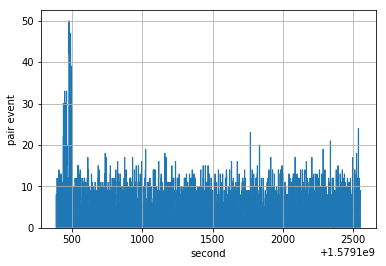

In [32]:
#plot the seoconds were the identical hits occure
ax = dublicates_all['poll_s'].plot.hist(\
            fill=True,histtype='step',grid='True',bins=1000)
ax.set_xlabel('second')
ax.set_ylabel('pair event')
plt.show()

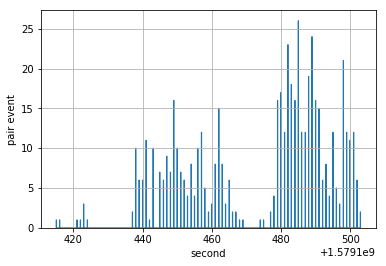

In [37]:
#plot the seoconds were the identical hits occure
ax = dublicates_ts1['poll_s'].plot.hist(\
            fill=True,histtype='step',grid='True',bins=1000)
ax.set_xlabel('second')
ax.set_ylabel('pair event')
plt.show()

In [12]:
# print a few for cross check
dublicates_ts1.sort_values(by=['ev_ts0']).head(12)

,ev_mac5,ev_flags,ev_buffer,ev_ts0,ev_ts1,ev_adc1,poll_s,poll_ns,poll_s_end,poll_ns_end,ev_in_poll,corr_s,corr_ns,corr_s_end,corr_ns_end,feb_evcounter,rate_counter,ev_poll_nr
entry,,,,,,,,,,,,,,,,,,
78007,0,1,259,594185,864048185,0,1579100445,813941735,1579100445,821147972,411,-1,1661,-1,-1,78008,1,188
79031,0,1,445,594185,864048185,0,1579100446,437938729,1579100446,445001446,392,-1,1762,-1,-1,79032,1,190
78008,0,1,260,2543122,865997123,166,1579100445,813941735,1579100445,821147972,411,-1,1661,-1,-1,78009,2,188
79032,0,1,446,2543122,865997123,166,1579100446,437938729,1579100446,445001446,392,-1,1762,-1,-1,79033,2,190
78009,0,1,261,2682365,866136365,136,1579100445,813941735,1579100445,821147972,411,-1,1661,-1,-1,78010,3,188
79033,0,1,447,2682365,866136365,136,1579100446,437938729,1579100446,445001446,392,-1,1762,-1,-1,79034,3,190
149415,0,1,396,3200954,179563647,145,1579100499,489934171,1579100499,497094286,404,-1,1750,-1,-1,149416,1032,360
148391,0,1,182,3200954,179563647,145,1579100498,865940195,1579100498,873240879,425,-1,1669,-1,-1,148392,8,358
149416,0,1,397,3627573,179990266,137,1579100499,489934171,1579100499,497094286,404,-1,1750,-1,-1,149417,1033,360


In [23]:
# calculated how many pairs are statistically expected
# like: choose k from n with put back, binomial distribution, problem with high numbers
# so calculate numbers for 10'000 insted 1e9
k_all = event['ev_mac5'].count()
n = 10000
k = int(k_all*n/1e9+0.5)
P = (math.factorial(n)/math.factorial(n-k))/math.pow(n,k)
print 'k = ',k,' n = ',n,' P= ',P # in 1-P cases we have dublicated hits
print 'So ', (1-P)*100,' out of one hundred should have at least one pair'
print k_all*n/1e9

k =  29  n =  10000  P=  0.960176050842
So  3.98239491577  out of one hundred should have at least one pair
28.73385


In [24]:
#Calculate the number of pairs for 1e9
fac_sec = 1e9/n
number_of_pairs = (1-P)*fac_sec
print 'Statistically expected of pairs: {0:0.2f}'.format(number_of_pairs),'± {0:0.2f}'.format(math.sqrt(number_of_pairs))

Statistically expected of pairs: 3982.39 ± 63.11


In [38]:
# count duplicates just ones each...
dublicates_all_ = event[event.duplicated(['ev_ts0'],keep='first')]
# count the number of exact the same events (real duplicates, not stochastical)
dublicates_ts1_ = event[event.duplicated(['ev_ts0','ev_ts1','ev_adc1'],keep='first')]

In [39]:
dublicates_all_.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 26368 to 2875270
Columns: 18 entries, ev_mac5 to ev_poll_nr
dtypes: int32(17), uint16(1)
memory usage: 341.1 KB


In [40]:
dublicates_ts1_.info(verbose=False)
dublicates_ts1_.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 38693 to 155443
Columns: 18 entries, ev_mac5 to ev_poll_nr
dtypes: int32(17), uint16(1)
memory usage: 21.0 KB


,ev_mac5,ev_flags,ev_buffer,ev_ts0,ev_ts1,ev_adc1,poll_s,poll_ns,poll_s_end,poll_ns_end,ev_in_poll,corr_s,corr_ns,corr_s_end,corr_ns_end,feb_evcounter,rate_counter,ev_poll_nr
entry,,,,,,,,,,,,,,,,,,
38693,0,1,402,716695673,644920761,162,1579100416,165945974,1579100416,173286346,430,-1,1597,-1,-1,38694,640,93


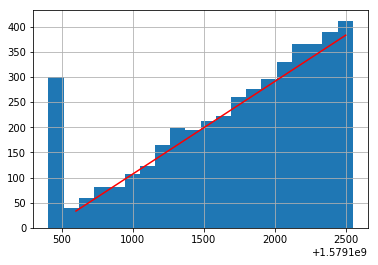

In [82]:
#plot the seoconds were the identical hits occure
#ax = dublicates_all_['poll_s'].plot.hist(\
#            fill=True,histtype='step',grid='True',bins=20)
entries, edges, patches = plt.hist(dublicates_all_.query('poll_s>1.5791e9+550')['poll_s'],\
                                   bins=20, histtype='stepfilled', label='my_label')
bin_centers = 0.5 * (edges[:-1] + edges[1:])
slope, intercept, r_value, p_value, std_err = stats.linregress(bin_centers,entries)
plt.close() 
entries, edges, patches = plt.hist(dublicates_all_['poll_s'],\
                                   bins=20, histtype='stepfilled', label='my_label')
plt.plot(bin_centers, intercept + slope*bin_centers, 'r', label='Fitted line y = %1.2fx %1.2f'%(slope,intercept))
plt.grid('True')
plt.show()

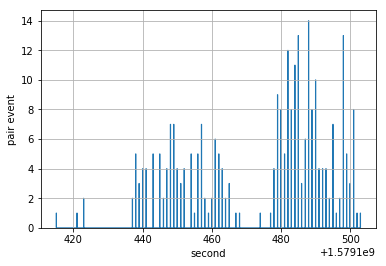

In [68]:
#plot the seoconds were the identical hits occure
ax = dublicates_ts1_['poll_s'].plot.hist(\
            fill=True,histtype='step',grid='True',bins=1000)
ax.set_xlabel('second')
ax.set_ylabel('pair event')
plt.show()

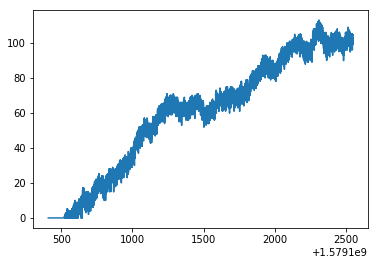

In [56]:
cut = 'poll_s>1e8 & abs(poll_ns - ev_ts0)<1e6'
plt.plot(tree_feb.query(cut)['poll_s'],tree_feb.query(cut)['ev_buffer'])

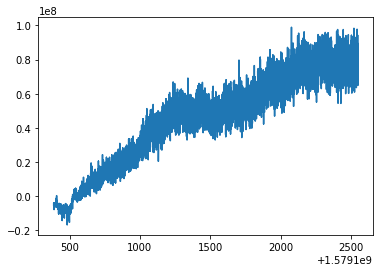

In [65]:
cut = 'poll_s>1e8 & ev_buffer==0 & abs(poll_ns - ev_ts0)<1e8'
plt.plot(tree_feb.query(cut)['poll_s'],tree_feb.query(cut)['poll_ns']-tree_feb.query(cut)['ev_ts0'])

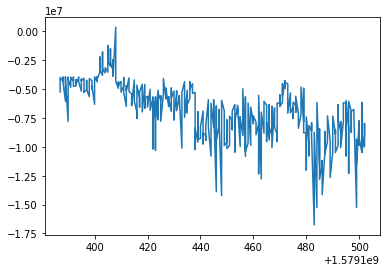

In [86]:
cut = 'poll_s>1e8 & ev_buffer==0 & abs(poll_ns - ev_ts0)<1e8 & poll_s<1579100503'
plt.plot(tree_feb.query(cut)['poll_s'],tree_feb.query(cut)['poll_ns']-tree_feb.query(cut)['ev_ts0'])

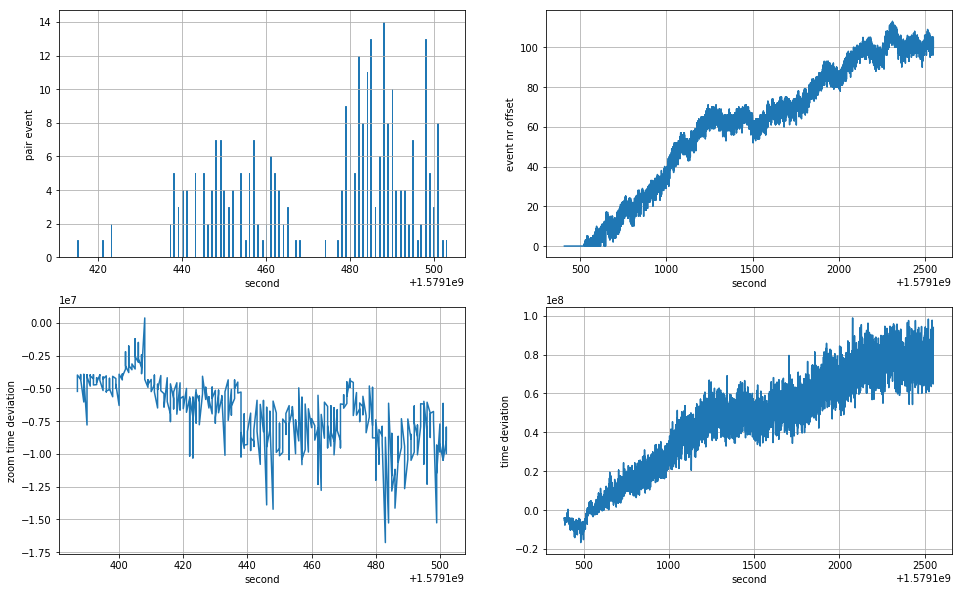

In [100]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs[0][0].hist(dublicates_ts1_['poll_s'],fill=True,histtype='step',bins=500)
axs[0][0].set_xlabel('second')
axs[0][0].set_ylabel('pair event')
axs[0][0].grid(True)
cut = 'poll_s>1e8 & abs(poll_ns - ev_ts0)<1e6'
axs[0][1].plot(tree_feb.query(cut)['poll_s'],tree_feb.query(cut)['ev_buffer'])
axs[0][1].set_xlabel('second')
axs[0][1].set_ylabel('event nr offset')
axs[0][1].grid(True)

cut = 'poll_s>1e8 & ev_buffer==0 & abs(poll_ns - ev_ts0)<1e8 & poll_s<1579100503'
axs[1][0].plot(tree_feb.query(cut)['poll_s'],tree_feb.query(cut)['poll_ns']-tree_feb.query(cut)['ev_ts0'])
axs[1][0].set_xlabel('second')
axs[1][0].set_ylabel('zoom time deviation')
axs[1][0].grid(True)

cut = 'poll_s>1e8 & ev_buffer==0 & abs(poll_ns - ev_ts0)<1e8'
axs[1][1].plot(tree_feb.query(cut)['poll_s'],tree_feb.query(cut)['poll_ns']-tree_feb.query(cut)['ev_ts0'])
axs[1][1].set_xlabel('second')
axs[1][1].set_ylabel('time deviation')
axs[1][1].grid(True)


In [28]:
# calculate how many of the 10k frames have more than zero pair
#calculate the 10k frame number
dublicates_all_ = event[event.duplicated(['ev_ts0'],keep='last')]
dublicates_all_['10kindex'] = (dublicates_all_['ev_ts0']/10000).apply(int)

/home/tmettler/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
# sort them, count the dublicates ony ones
dublicates_all_.sort_values(by=['10kindex'])['10kindex'].duplicated(keep='last').value_counts()

False    4389
True       89
Name: 10kindex, dtype: int64

In [22]:
# p value check:
p_value = 1.0-stats.poisson.cdf(4289,3982) # cdf = cumulated density function, see below
print('The p-value = %1.3E'% p_value) # This way can format the printing: 1.3f means one digit before comma and two digits after (f = float/real number)

The p-value = 7.367E-07


In [97]:
# p value check:
p_value = 1.0-stats.poisson.cdf(4289-276,3982) # cdf = cumulated density function, see below
print('The p-value = %1.3f'% p_value) # This way can format the printing: 1.3f means one digit before comma and two digits after (f = float/real number)

The p-value = 0.308


28.73385 5.312249446091552


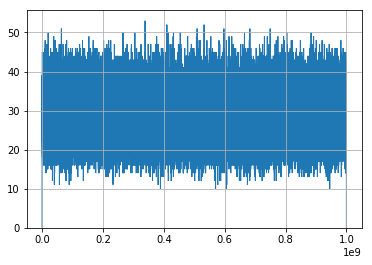

In [32]:
# more cross checks:
# is ts0 equally distributed?
entries, edges, patches = plt.hist(event['ev_ts0'],bins=100000, histtype='step',range=[0,1e9])
plt.grid(True)
print entries.mean(), entries.std()
# problem

2873.385 51.67437251675147


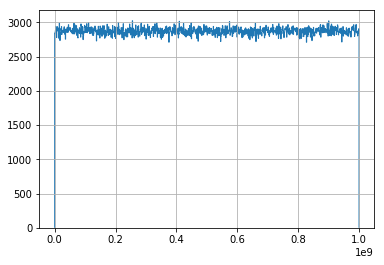

In [33]:
# is ts0 equally distributed?
entries, edges, patches = plt.hist(event['ev_ts0'],bins=1000, histtype='step',range=[0,1e9])
plt.grid(True)
print entries.mean(), entries.std()

In [105]:
event1 = tree_feb.query('ev_flags==1')

In [106]:
#event1['frame']= event1['ev_ts0']/100000
#event1.assign(frame = (event1.ev_ts0/100000 - event1.ev_ts0/100000%1))

In [107]:
#event1.groupby('frame').sum()
#event1['double'] = event1['ev_ts0'].duplicated(keep='last')
#print event1['double'].value_counts()

In [108]:
#event1.groupby('frame')['double'].any().value_counts()
#event1.head(10)

In [113]:
dublicates_all_ = event1[event.duplicated(['ev_ts0'],keep=False)]
dublicates_all_['10kindex'] = (dublicates_all_['ev_ts0']/10000).apply(int)

/home/tmettler/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
print dublicates_all_.sort_values(by=['10kindex'])['10kindex']

entry
2117792       23
848798        23
1864860       26
687352        26
2468010       35
566057        35
2351966       41
2262123       41
1579234       50
277992        50
78007         59
79031         59
737870        73
2203640       73
899175        78
1339809       78
2283411       93
1472722       93
295285       146
1064279      146
2687524      147
1925361      147
449767       152
2052745      152
80657        227
14195        227
947339       244
1770444      244
79032        254
78008        254
           ...  
156549     99666
1514095    99666
2453526    99668
1688834    99668
1777022    99684
2338606    99684
2667823    99699
151119     99699
1388784    99704
1887646    99704
2400774    99725
2770491    99725
27484      99730
1702297    99730
189857     99757
2861524    99757
1413937    99787
1907862    99787
582102     99795
669761     99795
103046     99798
104070     99798
223050     99840
1435281    99840
992608     99873
6228       99873
2760063    99915
801945  

In [115]:
dublicates_all_.duplicated('10kindex',keep='first').value_counts()

True     4566
False    4389
dtype: int64

In [116]:
print (dublicates_all_.sort_values(by=['ev_ts0'])['ev_ts0'].diff(periods=1)<10000).value_counts()

True     4666
False    4289
Name: ev_ts0, dtype: int64
